<a href="https://colab.research.google.com/github/EliwaaH/Deep-Learning-Projects/blob/main/Cats%26Dogs%20Using%20Transfer%20Learning(Features%20Extraction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here, we will use Kaggel cats and dogs dataset and we will build a classifier using Tensorflow and Keras from scratch.

This is the first part of three parts project which contains


*   Cats & Dogs classifier from scratch
*   **Cats & Dogs classifier using Feature Extraction method (This notebook)**

*   Cats & Dogs classifier using Fine Tuning method







In [24]:
import numpy as np
import os
import random
import zipfile 
import shutil
import tensorflow as tf 
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
from shutil import copyfile
import matplotlib.pyplot as plt

In [4]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/content/catsVdogs.zip"

--2022-09-23 18:02:16--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.72.44.156, 2600:1413:a000:6bb::317f, 2600:1413:a000:682::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.72.44.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/content/catsVdogs.zip’

/content/catsVdogs. 100%[===================>] 786.67M   261MB/s    in 3.0s    

2022-09-23 18:02:20 (261 MB/s) - ‘/content/catsVdogs.zip’ saved [824887076/824887076]



In [5]:
# Here, we are zipping our downloaded dataset and extract it in our working directory 

local_zip = "/content/catsVdogs.zip"
zip_file = zipfile.ZipFile(local_zip, 'r')
current_dir = os.getcwd()
zip_file.extractall(current_dir)
zip_file.close()

In [6]:
source_path = '/content/PetImages'

source_path_cats = os.path.join(source_path, 'Cat')
source_path_dogs = os.path.join(source_path, 'Dog')

# Here, we are removing any file that doesn't has the file format jpg in our working files
!find /content/PetImages/ -type f ! -name "*.jpg" -exec rm {} +

print(f'Found {len(os.listdir(source_path_cats))} images of cats')
print(f'Found {len(os.listdir(source_path_dogs))} images of dogs')

Found 12500 images of cats
Found 12500 images of dogs


So, After downloading our data and clean it we have to prepare our training and validation directories to copy cats and dogs images in it

In [7]:
# Training and Validation Directories Preparation

def create_train_valid_dirs():
  
  cur_dir = os.getcwd()

  
  #Checking if the main directory is already exists or not, if exist so delete the whole directroy
  if os.path.exists(os.path.join(f'{cur_dir}/catsVdogs')):
    shutil.rmtree(os.path.join(f'{cur_dir}/catsVdogs'))

  #creating the main directory
  os.mkdir(os.path.join(cur_dir, 'catsVdogs'))


  #creatin the training directory
  os.mkdir(os.path.join(f'{cur_dir}/catsVdogs', 'training'))
  os.mkdir(os.path.join(f'{cur_dir}/catsVdogs/training', 'cats'))
  os.mkdir(os.path.join(f'{cur_dir}/catsVdogs/training', 'dogs'))
  
  #creating the validation directory
  os.mkdir(os.path.join(f'{cur_dir}/catsVdogs', 'validation'))
  os.mkdir(os.path.join(f'{cur_dir}/catsVdogs/validation', 'cats'))
  os.mkdir(os.path.join(f'{cur_dir}/catsVdogs/validation', 'dogs'))

  pass

create_train_valid_dirs()

The next step is splitting our data into validation and training samples, so we will create a function that will do some steps on data before splitting

1.   Randomize our data by shuffling it by using (random.sample(list, len(list))
2.   Check if there's any image that doesn't have a size(undefined image)

1.   Splitting our data by a ratio that we will define





In [8]:
def split_data(source_dir, training_dir, validation_dir, split_size):
  
  shuffled_data = random.sample(list(os.listdir(source_dir)), len(os.listdir(source_dir)))
  training_number = int(len(shuffled_data) * split_size)

  i = 0
  dir = training_dir

  for im in shuffled_data:
    image_source = os.path.join(source_dir, im)

    if i == training_number:
      dir = validation_dir
    
    i += 1

    if os.path.getsize(image_source) == 0:
      print(f'{im} is zero lentgh, so ignoring')

    else:
      copyfile(image_source, os.path.join(dir, im))


  pass

After creating our function we have to define our paths and check the number of images that will fly to our image generators which will be the input for our classifier.

In [9]:
CAT_DIRECTORY = '/content/PetImages/Cat/'
DOG_DIRECTORY = '/content/PetImages/Dog/'

TRAINING_CAT_DIR = '/content/catsVdogs/training/cats/'
TRAINING_DOG_DIR = '/content/catsVdogs/training/dogs/'
VALIDATION_CAT_DIR = '/content/catsVdogs/validation/cats/'
VALIDATION_DOG_DIR = '/content/catsVdogs/validation/dogs/'


if len(os.listdir(TRAINING_CAT_DIR)) > 0:
  for file in os.scandir(TRAINING_CAT_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOG_DIR)) > 0:
  for file in os.scandir(TRAINING_DOG_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CAT_DIR)) > 0:
  for file in os.scandir(VALIDATION_CAT_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOG_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOG_DIR):
    os.remove(file.path)

split_data(CAT_DIRECTORY, TRAINING_CAT_DIR, VALIDATION_CAT_DIR, 0.9)
split_data(DOG_DIRECTORY, TRAINING_DOG_DIR, VALIDATION_DOG_DIR, 0.9)

print(f"\n\nThere are {len(os.listdir(TRAINING_CAT_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOG_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CAT_DIR))} images of cats for testing")
print(f"There are {len(os.listdir(VALIDATION_DOG_DIR))} images of dogs for testing")


666.jpg is zero lentgh, so ignoring
11702.jpg is zero lentgh, so ignoring


There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for testing
There are 1250 images of dogs for testing


Now, we are in the last part of preparing our data which is making the genrators that will be the classifier input.

Generators are very useful keras image API that can do a lot of operations to our data before going to the classifier like AUGMENTAION.

In [31]:
def create_image_generators(TRAINING_DIR, VALIDATION_DIR):

  train_data = ImageDataGenerator(
      rescale=1./255.,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      zoom_range=0.2,
      shear_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
  )

  train_generator=train_data.flow_from_directory(
      directory = TRAINING_DIR,
      batch_size = 128, 
      class_mode='binary',
      target_size = (150, 150)
  )

  valid_data = ImageDataGenerator(rescale=1./255.)

  validation_generator = valid_data.flow_from_directory(
      directory = VALIDATION_DIR, 
      batch_size = 32, 
      class_mode='binary',
      target_size = (150, 150)
  )

  return train_generator, validation_generator



In [33]:
TRAINING_DIR = '/content/catsVdogs/training/'
VALIDATION_DIR = '/content/catsVdogs/validation/'

train_generator, validation_generator= create_image_generators(TRAINING_DIR, VALIDATION_DIR)


Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


As we can see our Image generators successfuly defined two classes for every directory

**Here is the different part of the previous notebook becuase here we will use Transfer Learning (Feature Extraction), so we will download a model which will be the Inception_V3 model and we will use it's pretrained weights to extract our features from our teaining dataset.**

In [12]:
#First thing to do is to download the models' weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /content/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-09-23 18:02:33--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/content/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/content/inception_ 100%[===================>]  83.84M   119MB/s    in 0.7s    

2022-09-23 18:02:34 (119 MB/s) - ‘/content/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [13]:
#Second, We will load the model from keras library and save the path to it's weights

from tensorflow.keras.applications.inception_v3 import InceptionV3

downloaded_weights = '/content/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [14]:
def create_base_model(downloaded_weights):
  
  ## now we create a function that will preapre our base model

  base_model = InceptionV3(
      input_shape=(150, 150, 3),
      include_top=False,
      weights = None
  )

  # We pass our dowloaded weights to our base model
  base_model.load_weights(downloaded_weights)

  # This step is so important because here we are make all our base model layers untrainable and this what we are need
  # our model to change any of it's weights we just excluded it's top layer which will be replaced by our calssification layers
  base_model.trainable = False

  return base_model

In [15]:
## Here we will see the model layers and see what is the layer that we will take it as an input to our calssifier.

base_model = create_base_model(downloaded_weights)
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [16]:
## Here we are making sure that all the parameters of our base model are untrainable to avoid any overwrtiting or changing in our base model.

total_params = base_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in base_model.trainable_weights])

print(f'There are {total_params:,} total parameters in this model ')
print(f'There are {num_trainable_params} trainable parameters in this model')

There are 21,802,784 total parameters in this model 
There are 0 trainable parameters in this model


In [17]:
## Here we are making a CallBack to stop the training process when reached to a specific accuracy to avoid any wasting of time

class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.999):
      print("\nReached 99.9 accuracy so cancelling training!")
      self.model.stop_training = True

Now we are going to create our model and build our DNN from scratch using tensorflow and keras

In [18]:
## Here we are building our model which based on Base model and a classifications layers that will be our model output for our problem

def create_model(base_model):

  inputs = Input(shape=(150, 150, 3))
  x = base_model(inputs, training=False)
  x = Flatten()(x)
  x = Dense(1024, activation='relu')(x)
  x = Dropout(0.2)(x)
  x = Dense(1, activation='sigmoid')(x)

  model = Model(inputs = inputs, outputs =  x)
  
  return model

In [19]:
## As we can see here after adding our classifications layers for our base model, Now we have a trainable parameters that we can train them

model = create_model(base_model)
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f'There are {total_params:,} total parameters in this model ')
print(f'There are {num_trainable_params:,} trainable parameters in this model')

There are 40,679,201 total parameters in this model 
There are 18,876,417 trainable parameters in this model


In [20]:
## In this cell we are complining our model with a very low learning rate to try to get the best accuracy for training
## We use ADAM optimizer also we can use for this problem The RMSprop optimizer which will be good here too
## we have to use a proper loss function, This depending on our problem which here is a 0 or 1 classification

model.compile(optimizer = Adam(learning_rate=0.00001), 
             loss = 'binary_crossentropy', 
             metrics=['accuracy'])

In [22]:
callbacks = MyCallback()

history = model.fit(
    train_generator,
    epochs = 100, 
    verbose = 1,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/100
176/176 [==============================] - 167s 947ms/step - loss: 0.2009 - accuracy: 0.9209 - val_loss: 0.0843 - val_accuracy: 0.9712
Epoch 2/100
176/176 [==============================] - 161s 917ms/step - loss: 0.1706 - accuracy: 0.9302 - val_loss: 0.0764 - val_accuracy: 0.9712
Epoch 3/100
176/176 [==============================] - 161s 914ms/step - loss: 0.1592 - accuracy: 0.9352 - val_loss: 0.0767 - val_accuracy: 0.9736
Epoch 4/100
176/176 [==============================] - 161s 913ms/step - loss: 0.1521 - accuracy: 0.9376 - val_loss: 0.0778 - val_accuracy: 0.9732
Epoch 5/100
176/176 [==============================] - 161s 917ms/step - loss: 0.1499 - accuracy: 0.9387 - val_loss: 0.0777 - val_accuracy: 0.9732
Epoch 6/100
176/176 [==============================] - 162s 919ms/step - loss: 0.1422 - accuracy: 0.9408 - val_loss: 0.0784 - val_accuracy: 0.9724
Epoch 7/100
176/176 [==============================] - 161s 915ms/step - loss: 0.1418 - accuracy: 0.9404 - val_loss: 0

The Last step in our notebook is to visualize the training results so we can see how our training and validation accuracies like, This help us to know at which point our model is getting to overfit and where is the best training point that the model reached to it during training.

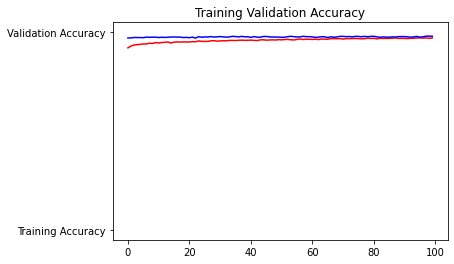

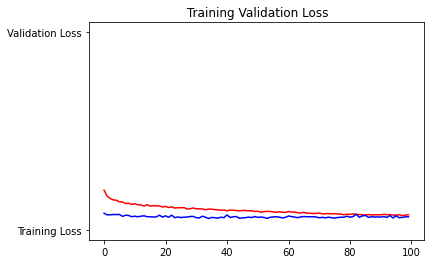

In [23]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(training_accuracy))

plt.plot(epochs, training_accuracy, 'r', "Training Accuracy")
plt.plot(epochs, validation_accuracy, 'b', "Validation Accuracy")
plt.title("Training Validation Accuracy")
plt.show()
print("")


plt.plot(epochs, training_loss, 'r', "Training Loss")
plt.plot(epochs, validation_loss, 'b', "Validation Loss")
plt.title(" Training Validation Loss")
plt.show()

In [48]:
images = os.listdir(os.path.join("/content/test_images/"))

for i in images:
  path="/content/test_images/" + i
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x /= 255.0
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images)


  for n in classes:
    if n[0] > 0.5:
      print(f'the probability for image {i} is dog')
    else:
      print(f'the probability for image {i} is cat')


the probability for image cat1.jpg is dog
the probability for image cat18.jpg is cat
the probability for image dog1.jpg is dog
the probability for image cat16.jpg is cat
the probability for image cat19.jpg is cat
the probability for image cat12.jpg is cat
the probability for image cat7.jpg is cat
the probability for image cat9.jpg is cat
the probability for image cat15.jpg is dog
the probability for image cat3.jpg is cat
the probability for image cat20.jpg is dog
the probability for image cat6.jpg is dog
the probability for image cat2.jpg is cat
the probability for image dog5.jpg is dog
the probability for image dog3.jpg is dog


IsADirectoryError: ignored